In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import glob

%matplotlib inline

In [2]:
# make a parser to include minutes, hours, days, months, years in one column and convert to datetime
def parse(yr, mo, doy, hr, min):
    yr, mo, doy, hr, min = [int(x) for x in [yr, mo, doy, hr, min]]
    dt = datetime(yr - 0, mo, doy, hr, min)
    return dt

## Station 44097 - Block Island, RI (154)

Available values for this buoy are:

1. WVHT: Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.
2. DPD: Dominant wave period (seconds) is the period with the maximum wave energy.
3. APD: Average wave period (seconds) of all waves during the 20-minute period.
4. MWD: The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees.

This is a Datawell directional waverider buoy, therefore there are also wave spectra available.

In [3]:
#read all files for the 44097 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44097'
all_files = glob.glob(path + "/*.txt")

b44097_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9,10,11], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44097_wave = b44097_wave[b44097_wave.WVHT !=99]
b44097_wave

,Date,WVHT,DPD,APD,MWD
0,2009-10-21 23:31:00,0.59,8.33,5.49,139
1,2009-10-22 00:01:00,0.65,8.33,5.73,139
2,2009-10-22 00:31:00,0.57,8.33,5.40,141
3,2009-10-22 01:01:00,0.55,5.88,5.32,173
4,2009-10-22 01:31:00,0.57,7.69,5.40,139
...,...,...,...,...,...
1481,2019-12-31 21:30:00,2.03,9.09,6.86,141
1482,2019-12-31 22:00:00,1.75,9.88,6.24,110
1483,2019-12-31 22:30:00,1.83,9.09,6.33,111
1484,2019-12-31 23:00:00,1.99,9.09,6.32,138


C:\Users\panmits86\Anaconda3\envs\gallery\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


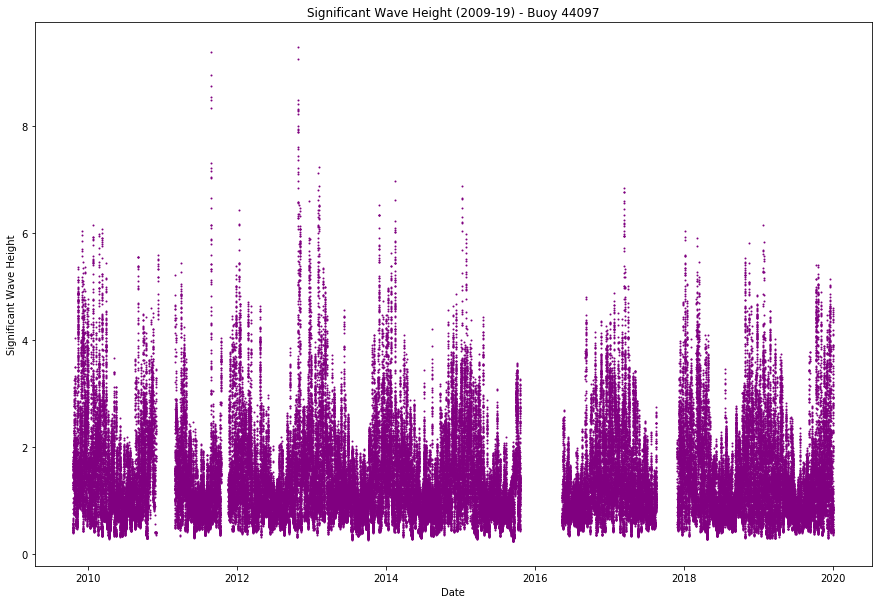

In [4]:
# plot time series of wave height and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44097_wave['Date'],b44097_wave['WVHT'],s=1,color='purple')
ax.set(xlabel="Date",
       ylabel="Significant Wave Height",
       title="Significant Wave Height (2009-19) - Buoy 44097")

plt.savefig('b44097_wave.png', dpi=300)

In [5]:
#save all data to tab delimiting txt file
b44097_wave.to_csv('b44097_wave.txt', sep='\t', index=False)

## Station 44020 (LLNR 13700) - NANTUCKET SOUND

Available values for this buoy are:

1. WDIR: Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.
2. WSPD: Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
3. GST:	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.
4. WVHT: Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.
5. DPD: Dominant wave period (seconds) is the period with the maximum wave energy.
6. APD: Average wave period (seconds) of all waves during the 20-minute period.
7. MWD: The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees.

In [6]:
#read all files for the 44020 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44020'
all_files = glob.glob(path + "/*.txt")

b44020_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9,10,11], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44020_wave = b44020_wave[b44020_wave.WVHT !=99]
b44020_wave

,Date,WVHT,DPD,APD,MWD
2,2009-03-10 15:50:00,0.61,6.25,4.18,93
3,2009-03-10 16:50:00,0.68,4.00,4.16,85
5,2009-03-10 18:50:00,0.52,5.56,4.45,85
6,2009-03-10 19:50:00,0.44,4.00,4.35,260
9,2009-03-10 22:50:00,0.37,5.00,3.71,88
...,...,...,...,...,...
2875,2019-12-31 19:40:00,0.49,9.09,3.93,100
2877,2019-12-31 20:40:00,0.52,9.09,3.79,101
2878,2019-12-31 21:40:00,0.52,9.09,3.89,108
2880,2019-12-31 22:40:00,0.45,10.00,4.13,91


In [7]:
#read all files for the 44020 buoy and concatenate them into one single pandas data frame and exclude wind speed error values
b44020_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44020_wind = b44020_wind[b44020_wind.WSPD !=99]
b44020_wind

,Date,WDIR,WSPD,GST
0,2009-03-10 13:50:00,47,4.9,6.8
1,2009-03-10 14:50:00,59,3.8,4.7
2,2009-03-10 15:50:00,29,2.5,2.9
3,2009-03-10 16:50:00,34,2.6,3.6
4,2009-03-10 17:50:00,67,3.0,3.5
...,...,...,...,...
2875,2019-12-31 19:40:00,999,5.7,6.6
2876,2019-12-31 20:20:00,999,5.0,6.7
2877,2019-12-31 20:40:00,999,6.0,7.3
2879,2019-12-31 22:00:00,999,4.2,5.4


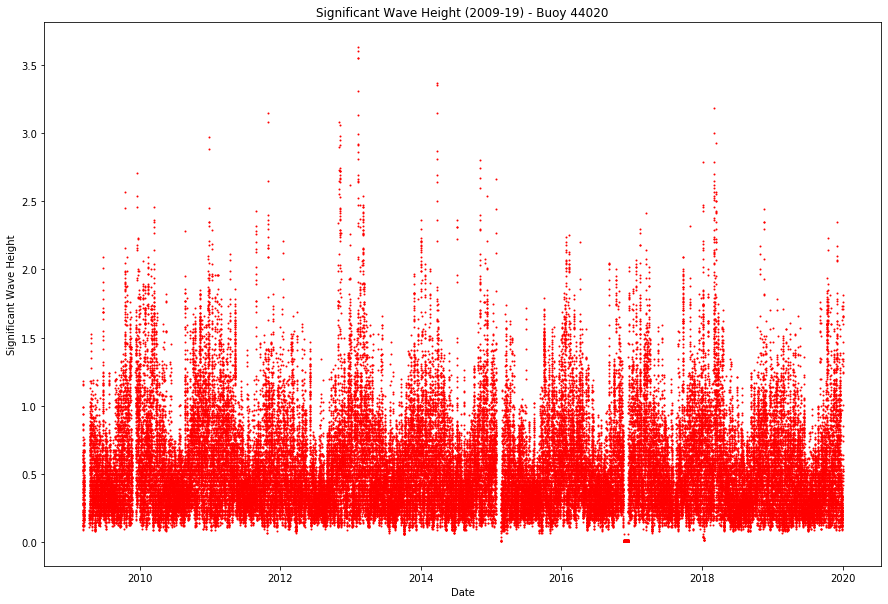

In [8]:
# plot time series of wave height and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44020_wave['Date'],b44020_wave['WVHT'],s=1,color='red')
ax.set(xlabel="Date",
       ylabel="Significant Wave Height",
       title="Significant Wave Height (2009-19) - Buoy 44020")

plt.savefig('b44020_wave.png', dpi=300)

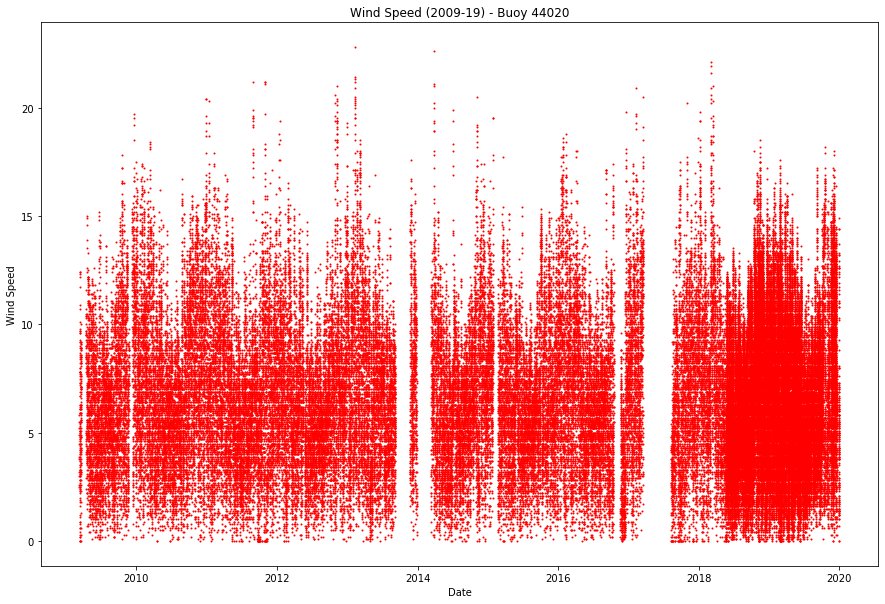

In [9]:
# plot time series of wind speed and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44020_wind['Date'],b44020_wind['WSPD'],s=1,color='red')
ax.set(xlabel="Date",
       ylabel="Wind Speed",
       title="Wind Speed (2009-19) - Buoy 44020")

plt.savefig('b44020_wind.png', dpi=300)

In [10]:
#save all wave and wind data to tab delimiting txt files
b44020_wave.to_csv('b44020_wave.txt', sep='\t', index=False)
b44020_wind.to_csv('b44020_wind.txt', sep='\t', index=False)

## Station 44025 (LLNR 830) - LONG ISLAND - 30 NM South of Islip, NY

Available values for this buoy are:

1. WDIR: Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.
2. WSPD: Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
3. GST:	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.
4. WVHT: Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.
5. DPD: Dominant wave period (seconds) is the period with the maximum wave energy.
6. APD: Average wave period (seconds) of all waves during the 20-minute period.
7. MWD: The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees.

In [11]:
#read all files for the 44025 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44025'
all_files = glob.glob(path + "/*.txt")

b44025_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9,10,11], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44025_wave = b44025_wave[b44025_wave.WVHT !=99]
b44025_wave

,Date,WVHT,DPD,APD,MWD
0,2005-01-01 00:00:00,0.87,3.70,3.92,201
1,2005-01-01 01:00:00,1.00,4.17,4.03,191
2,2005-01-01 02:00:00,1.27,4.55,4.14,194
3,2005-01-01 03:00:00,1.42,4.76,4.35,201
4,2005-01-01 04:00:00,1.60,5.00,4.53,210
...,...,...,...,...,...
738,2019-12-31 18:50:00,1.83,10.00,6.36,105
739,2019-12-31 19:50:00,1.85,10.00,6.52,113
740,2019-12-31 20:50:00,1.76,10.00,6.40,107
741,2019-12-31 21:50:00,1.78,10.00,6.11,96


In [12]:
#read all files for the 44025 buoy and concatenate them into one single pandas data frame and exclude wind speed error values
b44025_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44025_wind = b44025_wind[b44025_wind.WSPD !=99]
b44025_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 00:00:00,195,9.0,10.2
1,2005-01-01 01:00:00,197,9.3,10.9
2,2005-01-01 02:00:00,212,8.9,10.4
3,2005-01-01 03:00:00,214,9.8,11.6
4,2005-01-01 04:00:00,218,10.2,11.9
...,...,...,...,...
738,2019-12-31 18:50:00,999,7.2,9.1
739,2019-12-31 19:50:00,999,6.8,8.5
740,2019-12-31 20:50:00,999,7.1,8.5
741,2019-12-31 21:50:00,999,9.0,10.4


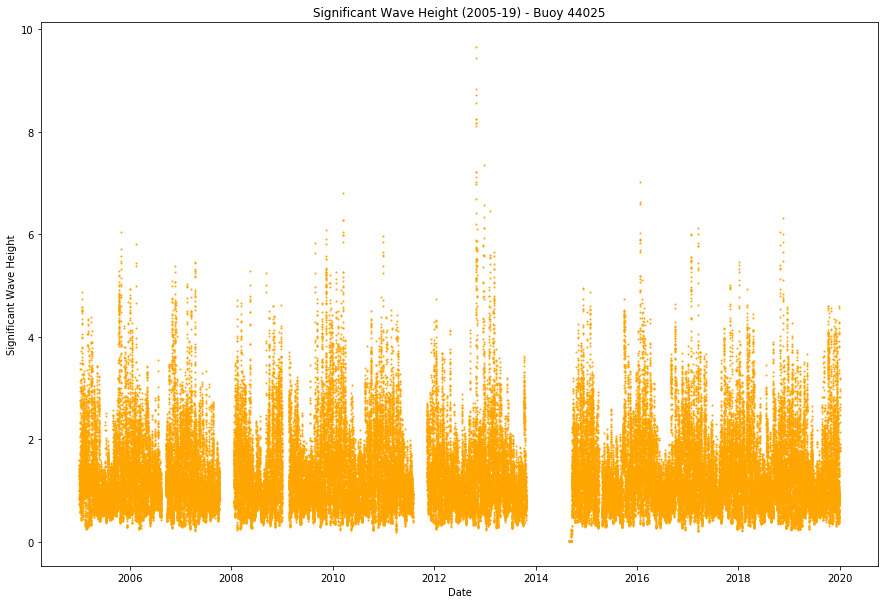

In [13]:
# plot time series of wave height and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44025_wave['Date'],b44025_wave['WVHT'],s=1,color='orange')
ax.set(xlabel="Date",
       ylabel="Significant Wave Height",
       title="Significant Wave Height (2005-19) - Buoy 44025")

plt.savefig('b44025_wave.png', dpi=300)

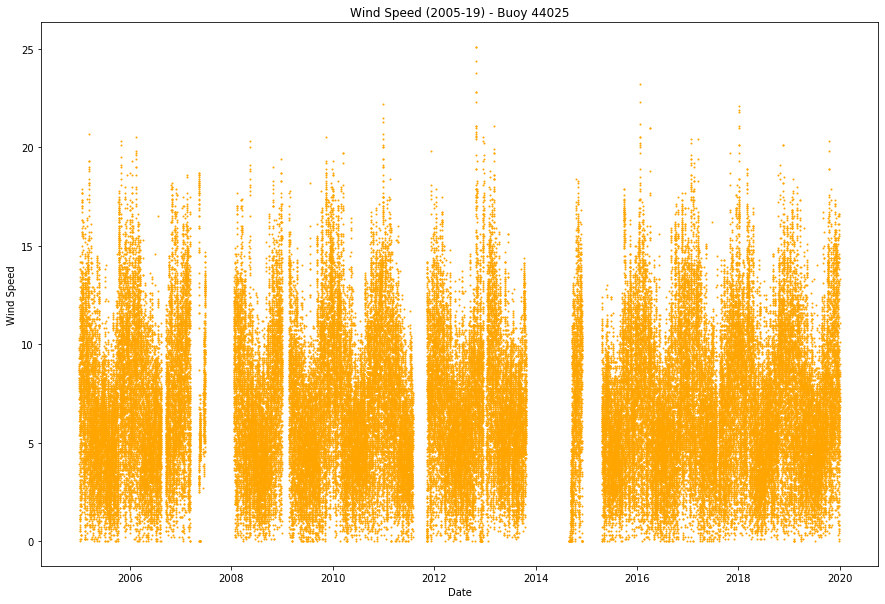

In [14]:
# plot time series of wind speed and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44025_wind['Date'],b44025_wind['WSPD'],s=1,color='orange')
ax.set(xlabel="Date",
       ylabel="Wind Speed",
       title="Wind Speed (2005-19) - Buoy 44025")

plt.savefig('b44025_wind.png', dpi=300)

In [15]:
#save all wave and wind data to tab delimiting txt files
b44025_wave.to_csv('b44025_wave.txt', sep='\t', index=False)
b44025_wind.to_csv('b44025_wind.txt', sep='\t', index=False)

## Station 44017 (LLNR 665) - MONTAUK POINT - 23 NM SSW of Montauk Point, NY

Available values for this buoy are:

1. WDIR: Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.
2. WSPD: Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
3. GST:	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.
4. WVHT: Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.
5. DPD: Dominant wave period (seconds) is the period with the maximum wave energy.
6. APD: Average wave period (seconds) of all waves during the 20-minute period.
7. MWD: The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees.

In [16]:
#read all files for the 44017 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44017'
all_files = glob.glob(path + "/*.txt")

b44017_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9,10,11], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44017_wave = b44017_wave[b44017_wave.WVHT !=99]
b44017_wave

,Date,WVHT,DPD,APD,MWD
0,2005-01-01 01:00:00,1.02,4.76,4.06,999
1,2005-01-01 02:00:00,1.19,5.26,4.15,999
2,2005-01-01 03:00:00,1.29,5.26,4.19,999
3,2005-01-01 04:00:00,1.39,4.17,4.15,999
4,2005-01-01 05:00:00,1.52,4.55,4.28,999
...,...,...,...,...,...
3199,2019-08-23 06:40:00,1.37,7.69,5.45,189
3205,2019-08-23 07:40:00,1.36,7.69,5.65,191
3211,2019-08-23 08:40:00,1.38,7.14,5.63,188
3217,2019-08-23 09:40:00,1.31,7.69,5.54,194


In [17]:
#read all files for the 44017 buoy and concatenate them into one single pandas data frame and exclude wind speed error values
b44017_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44017_wind = b44017_wind[b44017_wind.WSPD !=99]
b44017_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 01:00:00,204,8.0,9.1
1,2005-01-01 02:00:00,205,8.5,10.0
2,2005-01-01 03:00:00,214,9.1,10.5
3,2005-01-01 04:00:00,223,9.4,11.5
4,2005-01-01 05:00:00,229,10.0,12.2
...,...,...,...,...
3223,2019-08-23 10:40:00,359,5.8,7.7
3224,2019-08-23 10:50:00,16,6.7,9.4
3225,2019-08-23 11:00:00,9,6.8,8.5
3226,2019-08-23 11:10:00,6,7.3,9.2


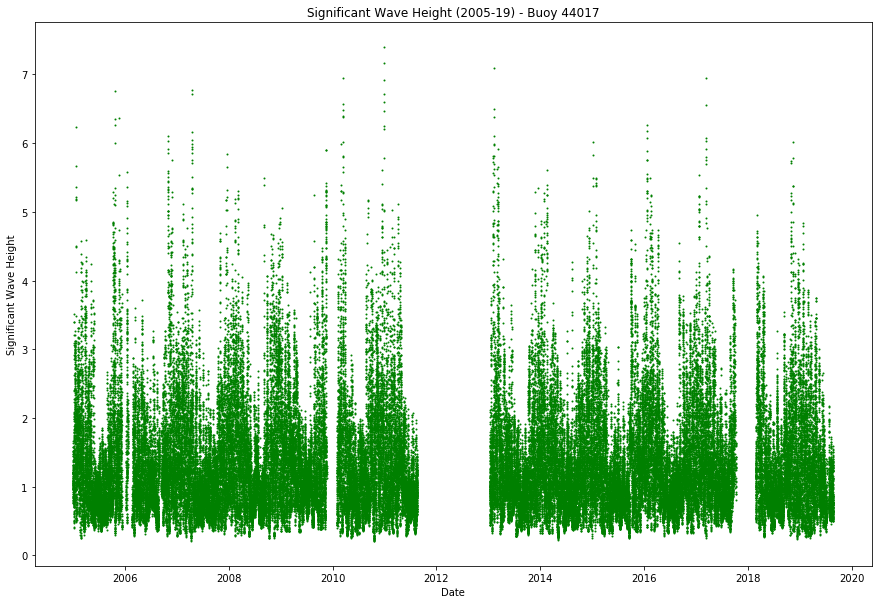

In [18]:
# plot time series of wave height and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44017_wave['Date'],b44017_wave['WVHT'],s=1,color='green')
ax.set(xlabel="Date",
       ylabel="Significant Wave Height",
       title="Significant Wave Height (2005-19) - Buoy 44017")

plt.savefig('b44017_wave.png', dpi=300)

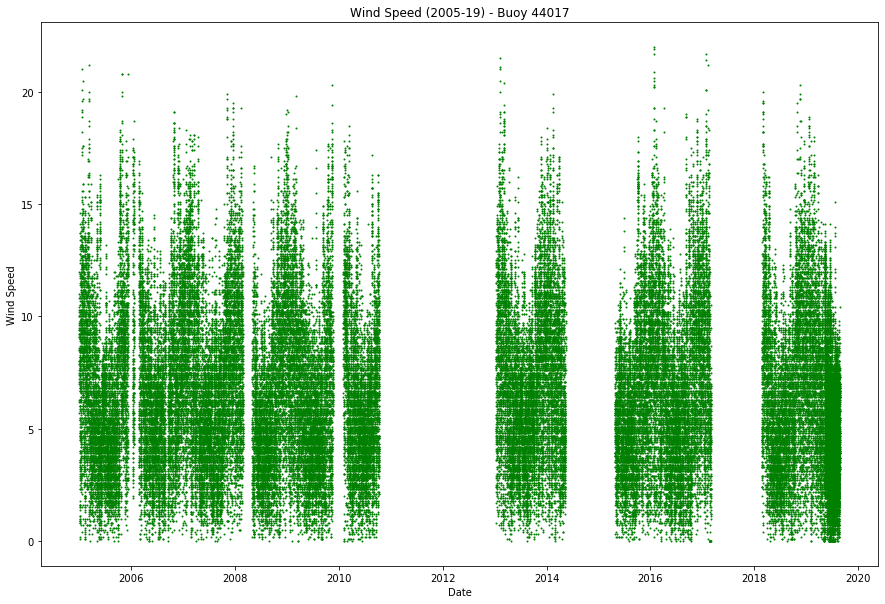

In [19]:
# plot time series of wind speed and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44017_wind['Date'],b44017_wind['WSPD'],s=1,color='green')
ax.set(xlabel="Date",
       ylabel="Wind Speed",
       title="Wind Speed (2005-19) - Buoy 44017")

plt.savefig('b44017_wind.png', dpi=300)

In [20]:
#save all wave and wind data to tab delimiting txt files
b44017_wave.to_csv('b44017_wave.txt', sep='\t', index=False)
b44017_wind.to_csv('b44017_wind.txt', sep='\t', index=False)

## Station 44065 (LLNR 725) - New York Harbor Entrance - 15 NM SE of Breezy Point , NY

Available values for this buoy are:

1. WDIR: Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.
2. WSPD: Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
3. GST:	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.
4. WVHT: Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.
5. DPD: Dominant wave period (seconds) is the period with the maximum wave energy.
6. APD: Average wave period (seconds) of all waves during the 20-minute period.
7. MWD: The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees.

In [21]:
#read all files for the 44065 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44065'
all_files = glob.glob(path + "/*.txt")

b44065_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9,10,11], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44065_wave = b44065_wave[b44065_wave.WVHT !=99]
b44065_wave

,Date,WVHT,DPD,APD,MWD
0,2008-10-30 17:50:00,0.67,3.70,3.36,303
1,2008-10-30 18:50:00,0.54,3.23,3.16,312
2,2008-10-30 19:50:00,0.56,3.33,3.25,312
3,2008-10-30 20:50:00,0.61,3.45,3.37,316
5,2008-10-30 22:50:00,0.61,3.57,3.35,317
...,...,...,...,...,...
4438,2019-12-31 19:40:00,1.61,10.00,7.13,110
4444,2019-12-31 20:40:00,1.65,10.00,7.22,105
4450,2019-12-31 21:40:00,1.43,9.09,6.05,102
4456,2019-12-31 22:40:00,1.40,9.09,6.06,103


In [22]:
#read all files for the 44065 buoy and concatenate them into one single pandas data frame and exclude wind speed error values
b44065_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44065_wind = b44065_wind[b44065_wind.WSPD !=99]
b44065_wind

,Date,WDIR,WSPD,GST
0,2008-10-30 17:50:00,308,8.2,11.0
1,2008-10-30 18:50:00,314,8.3,11.1
2,2008-10-30 19:50:00,303,7.1,9.8
3,2008-10-30 20:50:00,324,8.1,10.2
4,2008-10-30 21:50:00,314,7.9,10.3
...,...,...,...,...
4459,2019-12-31 23:10:00,229,6.5,8.1
4460,2019-12-31 23:20:00,229,6.7,8.2
4461,2019-12-31 23:30:00,225,6.9,8.7
4462,2019-12-31 23:40:00,224,7.6,9.0


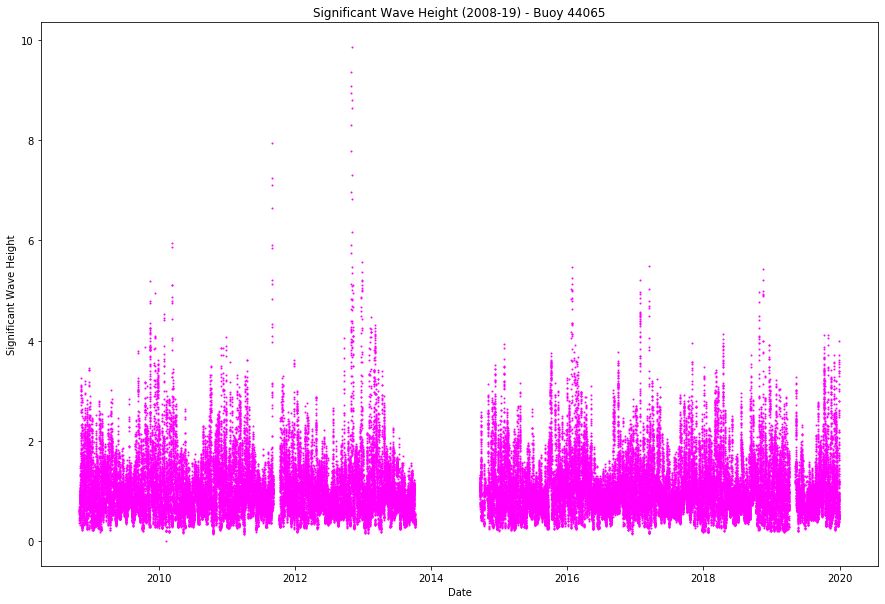

In [23]:
# plot time series of wave height and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44065_wave['Date'],b44065_wave['WVHT'],s=1,color='magenta')
ax.set(xlabel="Date",
       ylabel="Significant Wave Height",
       title="Significant Wave Height (2008-19) - Buoy 44065")

plt.savefig('b44065_wave.png', dpi=300)

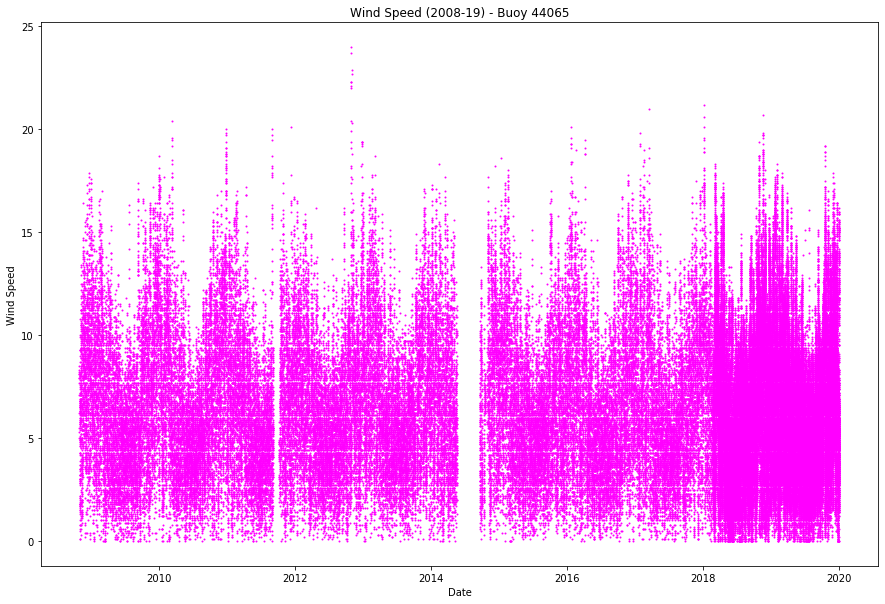

In [24]:
# plot time series of wind speed and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44065_wind['Date'],b44065_wind['WSPD'],s=1,color='magenta')
ax.set(xlabel="Date",
       ylabel="Wind Speed",
       title="Wind Speed (2008-19) - Buoy 44065")

plt.savefig('b44065_wind.png', dpi=300)

In [25]:
#save all wave and wind data to tab delimiting txt files
b44065_wave.to_csv('b44065_wave.txt', sep='\t', index=False)
b44065_wind.to_csv('b44065_wind.txt', sep='\t', index=False)

## Station 44039 - Central Long Island Sound

Available values for this buoy are:

1. WDIR: Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.
2. WSPD: Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
3. GST:	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.
4. WVHT: Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.
5. DPD: Dominant wave period (seconds) is the period with the maximum wave energy.

In [26]:
#read all files for the 44039 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44039'
all_files = glob.glob(path + "/*.txt")

b44039_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44039_wave = b44039_wave[b44039_wave.WVHT !=99]
b44039_wave

,Date,WVHT,DPD
0,2005-01-01 00:00:00,0.5,3.0
1,2005-01-01 02:00:00,0.6,4.0
2,2005-01-01 03:00:00,0.6,4.0
3,2005-01-01 04:00:00,0.6,4.0
4,2005-01-01 05:00:00,0.5,4.0
...,...,...,...
1,2019-06-28 13:30:00,0.2,99.0
2,2019-06-28 17:23:00,0.0,99.0
3,2019-06-28 18:45:00,0.0,99.0
4,2019-06-28 19:53:00,0.1,99.0


In [27]:
#read all files for the 44039 buoy and concatenate them into one single pandas data frame and exclude wind speed error values
b44039_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44039_wind = b44039_wind[b44039_wind.WSPD !=99]
b44039_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 00:00:00,210,6.2,6.7
1,2005-01-01 02:00:00,240,7.7,7.7
2,2005-01-01 03:00:00,240,6.7,7.2
3,2005-01-01 04:00:00,250,6.7,7.2
4,2005-01-01 05:00:00,250,4.6,5.7
...,...,...,...,...
1,2019-06-28 13:30:00,280,3.6,99.0
2,2019-06-28 17:23:00,240,3.6,99.0
3,2019-06-28 18:45:00,240,3.6,99.0
4,2019-06-28 19:53:00,230,3.1,99.0


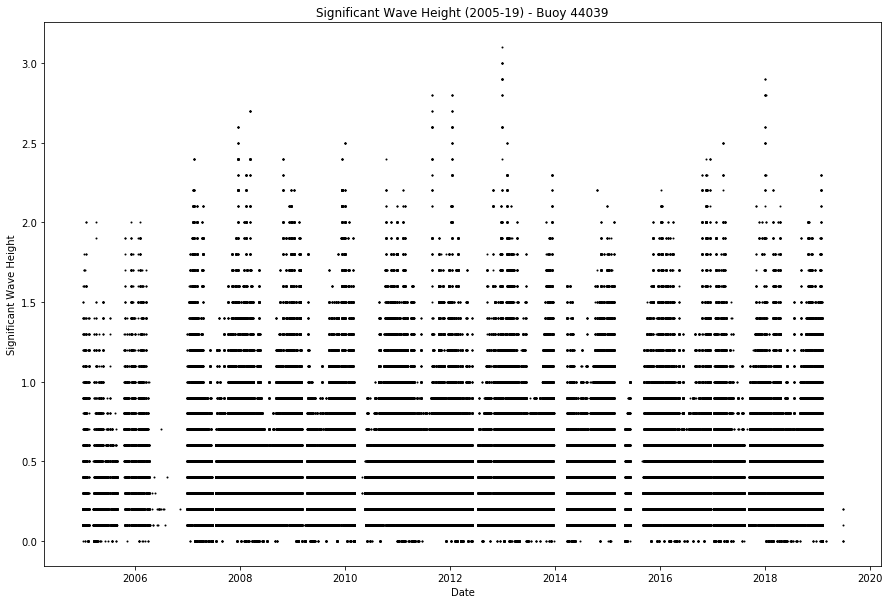

In [28]:
# plot time series of wave height and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44039_wave['Date'],b44039_wave['WVHT'],s=1,color='black')
ax.set(xlabel="Date",
       ylabel="Significant Wave Height",
       title="Significant Wave Height (2005-19) - Buoy 44039")

plt.savefig('b44039_wave.png', dpi=300)

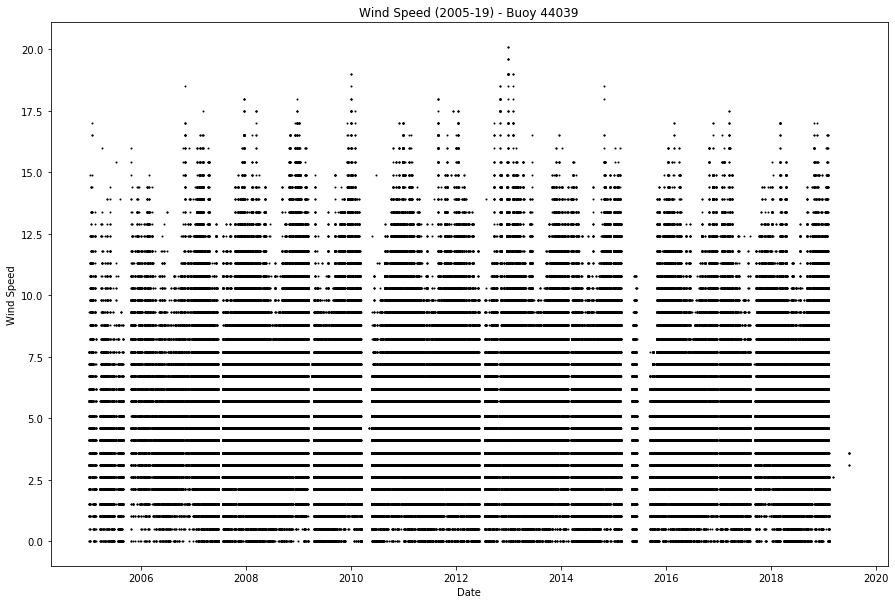

In [29]:
# plot time series of wind speed and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44039_wind['Date'],b44039_wind['WSPD'],s=1,color='black')
ax.set(xlabel="Date",
       ylabel="Wind Speed",
       title="Wind Speed (2005-19) - Buoy 44039")

plt.savefig('b44039_wind.png', dpi=300)

In [30]:
#save all wave and wind data to tab delimiting txt files
b44039_wave.to_csv('b44039_wave.txt', sep='\t', index=False)
b44039_wind.to_csv('b44039_wind.txt', sep='\t', index=False)

## Station 44040 - Western Long Island Sound

Available values for this buoy are:

1. WDIR: Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.
2. WSPD: Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
3. GST:	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.
4. WVHT: Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.
5. DPD: Dominant wave period (seconds) is the period with the maximum wave energy.

In [31]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_44040'
all_files = glob.glob(path + "/*.txt")

b44040_wave = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,8,9], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44040_wave = b44040_wave[b44040_wave.WVHT !=99]
b44040_wave

,Date,WVHT,DPD
1,2006-05-01 00:30:00,0.2,99.0
3,2006-05-01 01:30:00,0.2,99.0
5,2006-05-01 02:30:00,0.2,99.0
7,2006-05-01 03:30:00,0.2,99.0
9,2006-05-01 04:30:00,0.2,99.0
...,...,...,...
1437,2019-12-31 21:45:00,0.1,99.0
1438,2019-12-31 21:50:00,0.1,99.0
1439,2019-12-31 22:45:00,0.2,99.0
1440,2019-12-31 22:50:00,0.3,2.0


In [32]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wind speed error values
b44040_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
b44040_wind = b44040_wind[b44040_wind.WSPD !=99]
b44040_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 00:00:00,310,1.5,1.5
1,2005-01-01 01:00:00,240,4.1,5.1
2,2005-01-01 02:00:00,240,4.6,5.7
3,2005-01-01 03:00:00,260,5.7,6.2
4,2005-01-01 04:00:00,240,3.1,3.6
...,...,...,...,...
1437,2019-12-31 21:45:00,250,3.1,4.1
1438,2019-12-31 21:50:00,240,6.2,7.7
1439,2019-12-31 22:45:00,240,4.6,5.7
1440,2019-12-31 22:50:00,240,5.1,6.7


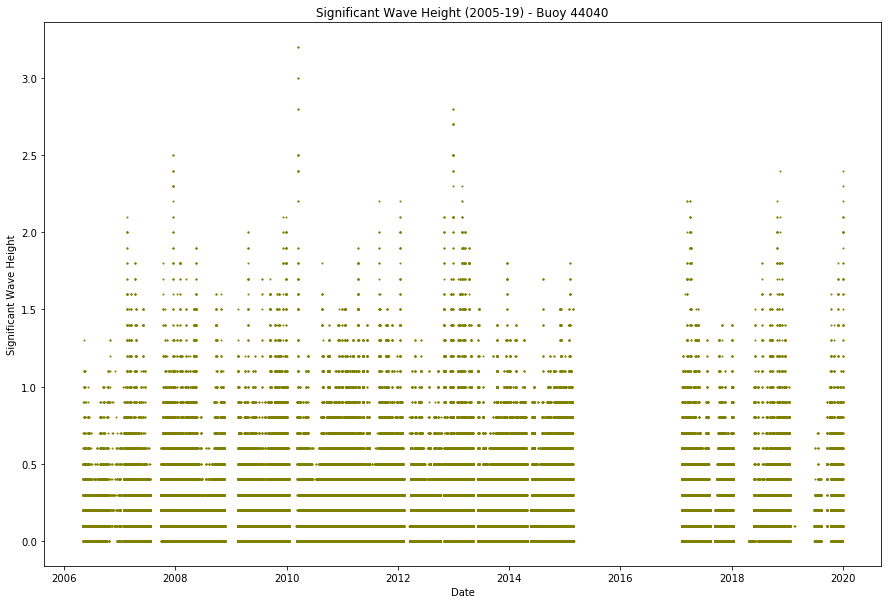

In [33]:
# plot time series of wave height and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44040_wave['Date'],b44040_wave['WVHT'],s=1,color='olive')
ax.set(xlabel="Date",
       ylabel="Significant Wave Height",
       title="Significant Wave Height (2005-19) - Buoy 44040")

plt.savefig('b44040_wave.png', dpi=300)

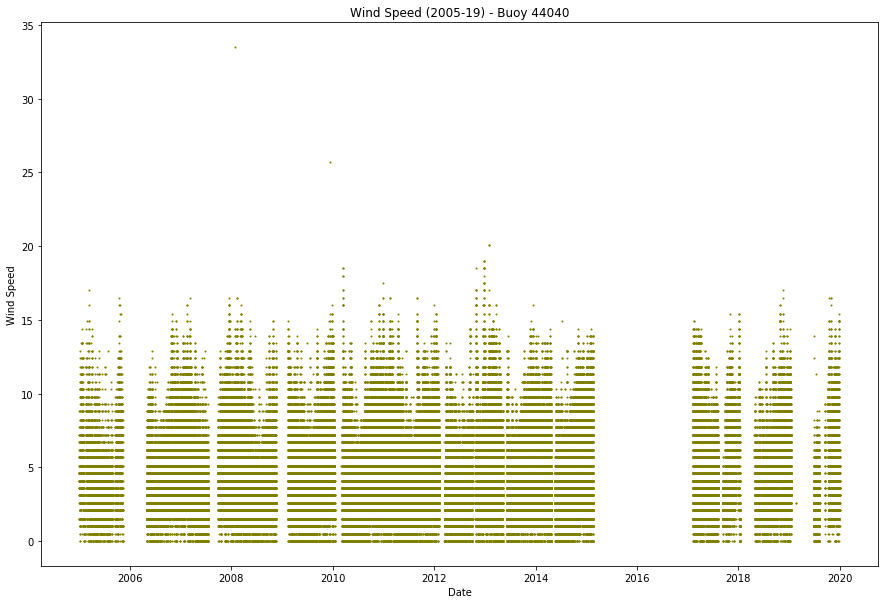

In [34]:
# plot time series of wind speed and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(b44040_wind['Date'],b44040_wind['WSPD'],s=1,color='olive')
ax.set(xlabel="Date",
       ylabel="Wind Speed",
       title="Wind Speed (2005-19) - Buoy 44040")

plt.savefig('b44040_wind.png', dpi=300)

In [35]:
#save all wave and wind data to tab delimiting txt files
b44040_wave.to_csv('b44040_wave.txt', sep='\t', index=False)
b44040_wind.to_csv('b44040_wind.txt', sep='\t', index=False)

## Station BUZM3 - Buzzards Bay, MA

Available values for this buoy are:

1. WDIR: Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.
2. WSPD: Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
3. GST:	Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.

In [36]:
#read all files for the 44040 buoy and concatenate them into one single pandas data frame and exclude wave height error values
path = r'C:/Users/panmits86/Desktop/Python/data/buoys/Station_BUZM3'
all_files = glob.glob(path + "/*.txt")

BUZM3_wind = pd.concat((pd.read_csv(f, delim_whitespace=True, 
                         skiprows=lambda x: x == 1, usecols=[0,1,2,3,4,5,6,7], header=0, date_parser=parse, 
                          parse_dates={'Date':['#YY','MM','DD','hh','mm']}) for f in all_files))
BUZM3_wind = BUZM3_wind[BUZM3_wind.WSPD !=99]
BUZM3_wind

,Date,WDIR,WSPD,GST
0,2005-01-01 00:00:00,200,8.1,8.3
1,2005-01-01 01:00:00,195,11.5,11.8
2,2005-01-01 02:00:00,193,12.1,12.7
3,2005-01-01 03:00:00,205,12.3,12.9
4,2005-01-01 04:00:00,219,12.7,13.4
...,...,...,...,...
739,2019-12-31 19:00:00,315,8.0,8.6
740,2019-12-31 20:00:00,324,5.8,6.2
741,2019-12-31 21:00:00,301,4.1,4.4
742,2019-12-31 22:00:00,276,6.0,6.3


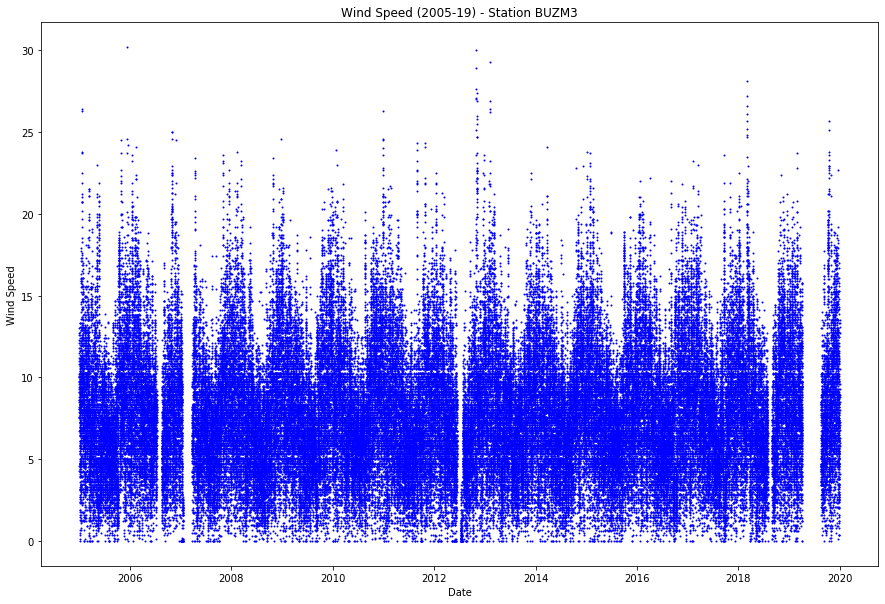

In [37]:
# plot time series of wind speed and save figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(BUZM3_wind['Date'],BUZM3_wind['WSPD'],s=1,color='blue')
ax.set(xlabel="Date",
       ylabel="Wind Speed",
       title="Wind Speed (2005-19) - Station BUZM3")

plt.savefig('BUZM3_wind.png', dpi=300)

In [38]:
#save all wind data to tab delimiting txt files
BUZM3_wind.to_csv('BUZM3_wind.txt', sep='\t', index=False)